<a href="https://colab.research.google.com/github/bbiasi/py1/blob/main/teste_pyomo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import files
import io

sns.set_style("darkgrid")

In [11]:
uploaded = files.upload()
file_name = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

Saving predictive_maintenance.csv to predictive_maintenance (1).csv


In [15]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 625.1+ KB


In [ ]:
# removendo colunas inuteis
# axis = 1 => colunas
# axis = 0 => linha
df = df.drop(["UDI",'Product ID'], axis = 1)

In [ ]:
# EDA

df.groupby(['Target', 'Failure Type']).count().drop(['Process temperature [K]',
                                                      'Rotational speed [rpm]',
                                                     'Torque [Nm]',
                                                     'Tool wear [min]',
                                                      'Air temperature [K]'], axis=1).rename(columns = {'Type':'count'})

In [31]:
df.groupby(['Target', 'Failure Type']).median(numeric_only = True)

Air temperature [K]  Process temperature [K]  \
Target Failure Type                                                             
0      No Failure                             300.00                    310.0   
       Random Failures                        300.75                    311.1   
1      Heat Dissipation Failure               302.45                    310.7   
       No Failure                             300.50                    309.9   
       Overstrain Failure                     299.45                    310.1   
       Power Failure                          300.40                    310.2   
       Tool Wear Failure                      300.40                    310.3   

                                 Rotational speed [rpm]  Torque [Nm]  \
Target Failure Type                                                    
0      No Failure                                1507.0        39.80   
       Random Failures                           1490.0        44.60   
1      Heat Dissipation Failure                  1346.0        52.35   
       No Failure                                1438.0        45.20   
       Overstrain Failure                        1362.5        56.75   
       Power Failure                             1386.0        63.60   
       Tool Wear Failure                         1521.0        37.70   

                                 Tool wear [min]  
Target Failure Type                               
0      No Failure                          107.0  
       Random Failures                     142.0  
1      Heat Dissipation Failure            106.0  
       No Failure                          119.0  
       Overstrain Failure                  207.0  
       Power Failure                       100.0  
       Tool Wear Failure                   215.0

In [33]:
df.groupby(['Type','Target']).median(numeric_only = True)

Air temperature [K]  Process temperature [K]  \
Type Target                                                 
H    0                     299.7                    309.9   
     1                     302.0                    310.2   
L    0                     300.1                    310.1   
     1                     301.2                    310.4   
M    0                     300.1                    310.0   
     1                     302.0                    310.6   

             Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
Type Target                                                        
H    0                       1502.0         40.2            106.0  
     1                       1371.0         53.8            147.0  
L    0                       1508.0         39.7            107.0  
     1                       1362.0         53.9            182.0  
M    0                       1506.0         40.0            105.0  
     1                       1372.0         51.6            125.0

/tmp/ipython-input-41-777760510.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(data = df[df['Target'] == 1],


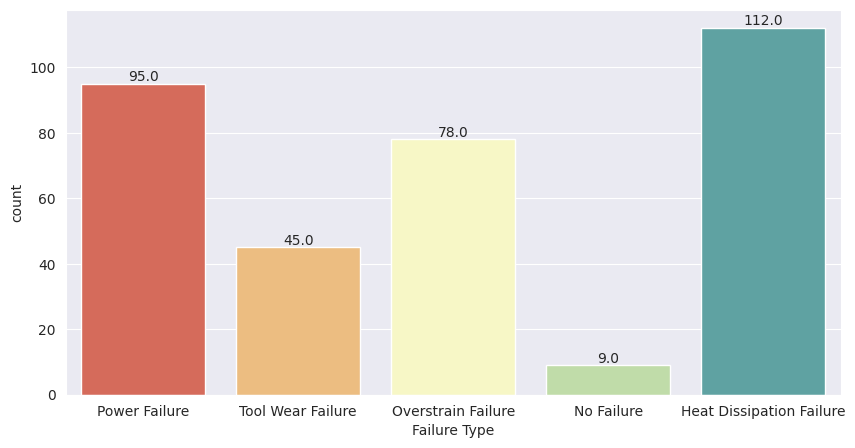

In [41]:
plt.figure(figsize = (10, 5))
plot = sns.countplot(data = df[df['Target'] == 1],
              x = "Failure Type",
              palette = 'Spectral')
for bar in plot.patches:
    plot.annotate(bar.get_height(),
                 (bar.get_x() + bar.get_width()/2, bar.get_height()),
                 ha = 'center', va = 'bottom')

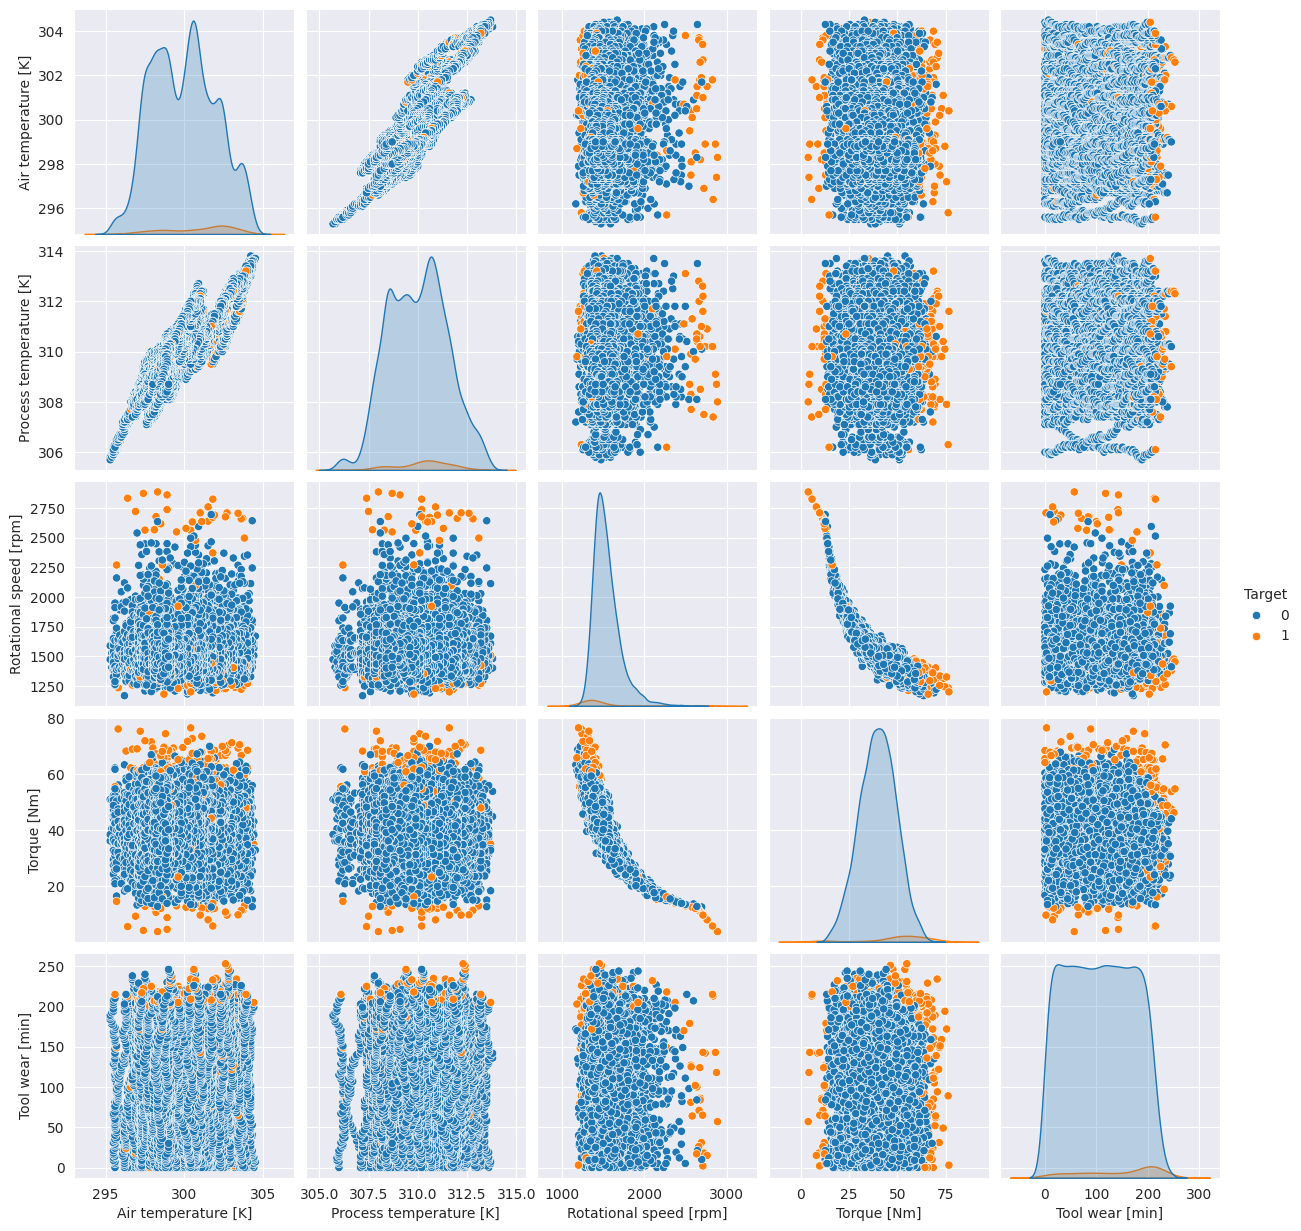

In [42]:
sns.pairplot(df, hue = 'Target')

In [46]:
import plotly.express as px

fig = px.scatter_3d(df,
                    # x = 'Process temperature [K]',
                    # x = 'Air temperature [K]',
                    x = 'Torque [Nm]',
                    y = 'Air temperature [K]',
                    z = 'Rotational speed [rpm]',
                    color = 'Target')
fig.show()

In [47]:
def feat_prob(feature, data):
    x,y = [],[]
    for j in data[feature].unique():
        temp = data
        temp = temp[temp[feature] >= j]
        y.append(round((temp.Target.mean()*100), 2))
        x.append(j)
    return(x, y)

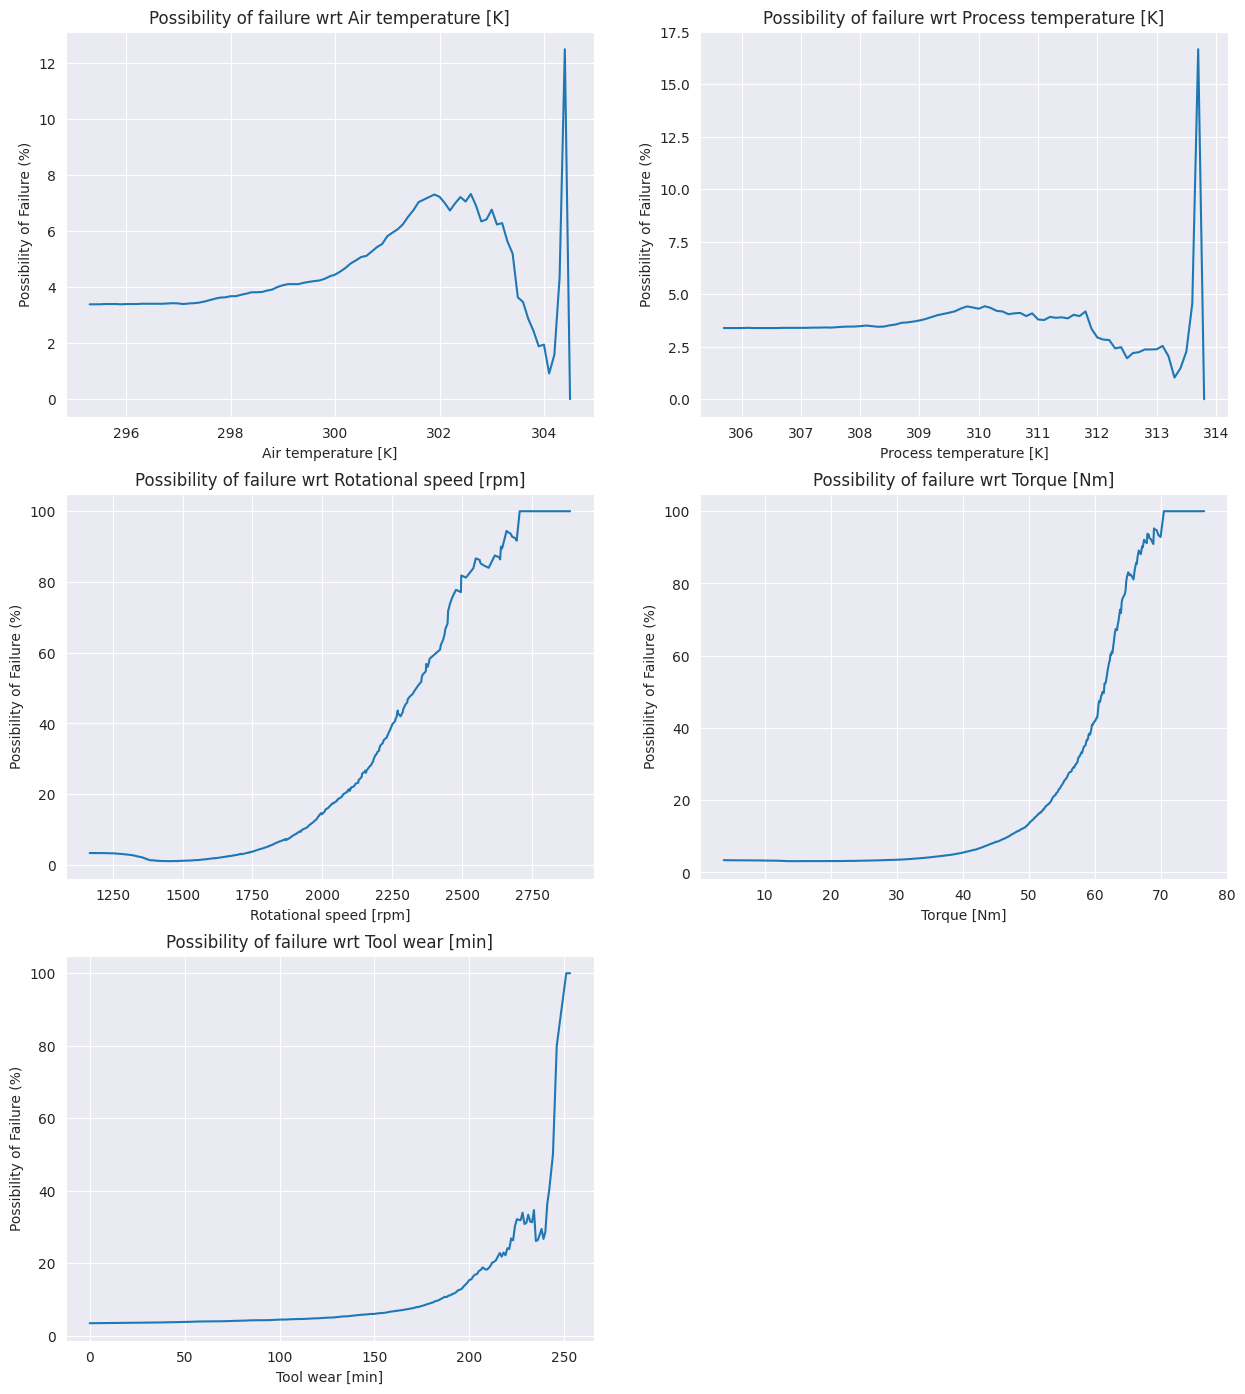

In [50]:
plt.figure(figsize = (15, 17))
m = 1
for i in ['Air temperature [K]',
          'Process temperature [K]',
          'Rotational speed [rpm]',
          'Torque [Nm]',
          'Tool wear [min]'] :
    plt.subplot(3, 2, m).set_title(label = ("Possibility of failure wrt " + i))
    x, y = feat_prob(i, df)
    plt.xlabel(i)
    plt.ylabel("Possibility of Failure (%)")
    sns.lineplot(y = y,x = x)
    m += 1

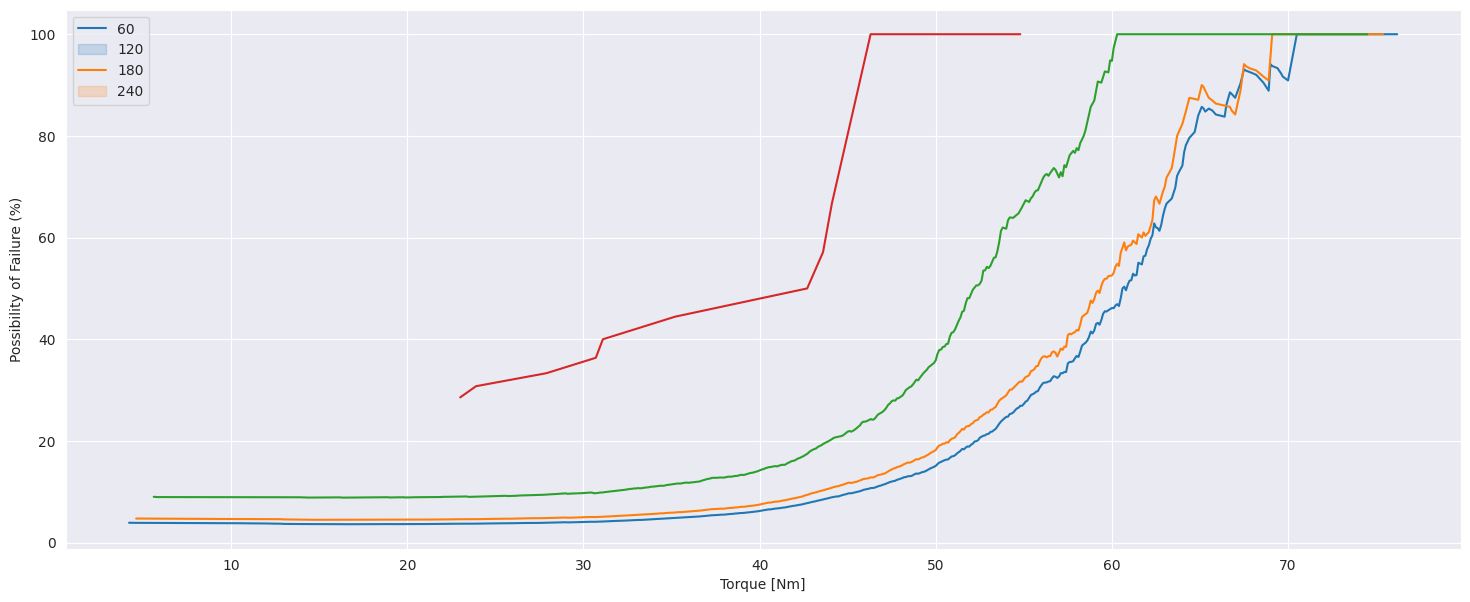

In [52]:
plt.figure(figsize = (18, 7))
m = 1

datasets = []
for i in [60, 120, 180, 240]:
    datasets.append(df[df['Tool wear [min]'] >= i])

for i in datasets :
    x, y = feat_prob("Torque [Nm]",i)
    plt.xlabel("Torque [Nm]")
    plt.ylabel("Possibility of Failure (%)")
    sns.lineplot(y = y, x = x, legend = 'brief')

    m += 1

plt.legend([60,120,180,240])

In [54]:
pprint(datasets.append(df[df['Tool wear [min]'] >= 90]))

Pretty printing has been turned OFF


Pre Processing for Prediction¶


In [60]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

label_encoder.fit(df['Type'])
df['Type'] = label_encoder.transform(df['Type'])

label_encoder.fit(df['Target'])
df['Target'] = label_encoder.transform(df['Target'])

In [61]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Failure Type','Target'], axis = 1),
                                                    df['Target'], test_size = 0.3, random_state = 42)

Predição

In [64]:
import time

from sklearn.metrics import accuracy_score,classification_report
classifier=[]
imported_as=[]

#LGBM
import lightgbm as lgb
lgbm = lgb.LGBMClassifier()
classifier.append('LightGBM')
imported_as.append('lgbm')

#MultiLayerPerceptron
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
classifier.append('Multi Layer Perceptron')
imported_as.append('mlp')

#Bagging
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
classifier.append('Bagging')
imported_as.append('bc')

#GBC
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
classifier.append('Gradient Boosting')
imported_as.append('gbc')

#ADA
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
classifier.append('Ada Boost')
imported_as.append('ada')

#XGB
import xgboost as xgb
from xgboost import XGBClassifier
xgb = XGBClassifier()
classifier.append('XG Boost')
imported_as.append('xgb')

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
classifier.append('Logistic Regression')
imported_as.append('lr')

#RFC
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
classifier.append('Random Forest')
imported_as.append('rfc')

#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
classifier.append('k Nearest Neighbours')
imported_as.append('knn')

#SVM
from sklearn.svm import SVC
svc = SVC()
classifier.append('Support Vector Machine')
imported_as.append('svc')

#Grid
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000,2000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
classifier.append('SVM tuning grid')
imported_as.append('grid')

#STcaking
from sklearn.ensemble import StackingClassifier
estimators=[('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
            ('svr',SVC(random_state=42))]
stc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
classifier.append('Stacked (RFR & SVM)')
imported_as.append('stc')

classifiers = pd.DataFrame({'Classifier':classifier,'Imported as':imported_as})
print('All Models Imported\nModels stored in dataframe called classifiers')

All Models Imported
Models stored in dataframe called classifiers
